In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [31]:
# change all .out files to .csv files
for root, dirs, files in os.walk("./"):
    for f in files:
        f_name = f.split(".")[0]
        f_type = f.split(".")[1]
        if f_type == "out":
            old_path = os.path.join(root, f"{f_name}.out")
            new_path = os.path.join(root, f"{f_name}.csv")
            os.rename(old_path, new_path)

In [25]:
# get all sequential files
DIR = "./2023-05-25T00-41-19-normal-sequential"
file_start = "ppseminar_sequential_"
file_end = ".csv"

csv_files = []
for i in range(1, 50 + 1):
    if i <= 5:
        # skip the first 5 for warumup
        continue
    # get all paths and save in list
    file_name = file_start + str(i) + file_end
    file_path = os.path.join(DIR, file_name)
    csv_files.append(file_path)

# get shape and init 3D array
df = pd.read_csv(os.path.join(DIR, file_start + "1" + file_end))
data = np.zeros((len(csv_files), *df.shape))

# read all csv files and save in 3D array
for i, path in enumerate(csv_files):
    df = pd.read_csv(path)
    data[i] = df.to_numpy()

# get mean of all csv files    
mean = data.mean(axis=0)

# save mean in dataframe
mean_df = pd.DataFrame(mean, columns=df.columns)

# convert size to int
mean_df['size'] = mean_df['size'].apply(lambda x: int(x))

# save mean dataframe to csv
mean_df.to_csv("sequential_mean.csv", index=False)

In [28]:
# get all sequential files
DIR = "./2023-05-25T00-41-20-gpu2080-parallel"
file_start = "ppseminar_parallel_"
file_end = ".csv"

csv_files = []
for i in range(1, 50 + 1):
    if i <= 5:
        # skip the first 5 for warumup
        continue
    # get all paths and save in list
    file_name = file_start + str(i) + file_end
    file_path = os.path.join(DIR, file_name)
    csv_files.append(file_path)

# get shape and init 3D array
df = pd.read_csv(os.path.join(DIR, file_start + "1" + file_end))
data = np.zeros((len(csv_files), *df.shape))

# read all csv files and save in 3D array
for i, path in enumerate(csv_files):
    df = pd.read_csv(path)
    data[i] = df.to_numpy()

# get mean of all csv files    
mean = data.mean(axis=0)

# save mean in dataframe
mean_df = pd.DataFrame(mean, columns=df.columns)

# convert size and numThreads to int
mean_df['size'] = mean_df['size'].apply(lambda x: int(x))
mean_df['numThreads'] = mean_df['numThreads'].apply(lambda x: int(x))

# save mean dataframe to csv
mean_df.to_csv("parallel_mean.csv", index=False)

In [29]:
# load DataFrames
parallel_df = pd.read_csv("parallel_mean.csv")
sequential_df = pd.read_csv("sequential_mean.csv")

In [62]:
x = parallel_df['size'].to_numpy() / 10000000
y_map_seq = sequential_df['map_duration'].to_numpy() / 1000
y_map_par = parallel_df['map_total'].to_numpy() / 1000
y_red_seq = sequential_df['reduce_duration'].to_numpy() / 1000
y_red_par = parallel_df['reduce_total'].to_numpy() / 1000
y_zip_seq = sequential_df['zip_duration'].to_numpy() / 1000
y_zip_par = parallel_df['zip_total'].to_numpy() / 1000

/var/folders/p4/fcs75ncn4_7_x5_jnc86l_400000gn/T/ipykernel_93194/1815748633.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


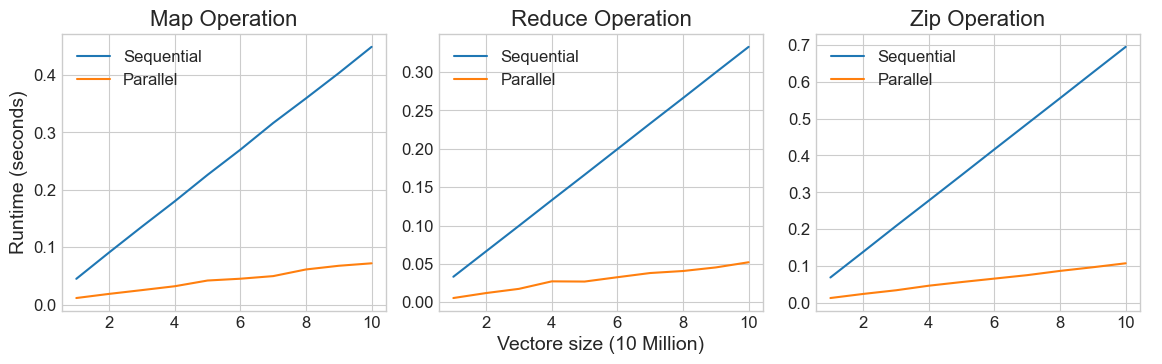

In [82]:
# Set style and size for better visibility
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3)

# Plot two lines on each subplot
axs[0].plot(x, y_map_seq, label='Sequential')
axs[0].plot(x, y_map_par, label='Parallel')

axs[1].plot(x, y_red_seq, label='Sequential')
axs[1].plot(x, y_red_par, label='Parallel')

axs[2].plot(x, y_zip_seq, label='Sequential')
axs[2].plot(x, y_zip_par, label='Parallel')

# Set a title for each subplot and labels for x and y axes
axs[0].set_title('Map Operation', fontsize=16)

axs[1].set_title('Reduce Operation', fontsize=16)

axs[2].set_title('Zip Operation', fontsize=16)

# Add legend to each subplot
axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
axs[2].legend(fontsize=12)

# Add a big subplot covering all smaller ones
big_subplot = fig.add_subplot(111, frame_on=False)
# Hide tick and tick label of the big subplot
big_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_subplot.grid(False)

# Set labels for the big subplot
big_subplot.set_xlabel("Vectore size (10 Million)", fontsize=14)
big_subplot.set_ylabel("Runtime (seconds)", fontsize=14)


# Display the figure with its subplots
plt.tight_layout()
plt.savefig('runtime.png', dpi=300)
plt.show()

In [67]:
parallel_df.head(1)

,size,numThreads,map_copy_device,map_kernel,map_copy_host,map_total,map_total_chrono,reduce_copy_device,reduce_kernel,reduce_copy_host,reduce_total,reduce_total_chrono,zip_copy_device,zip_kernel,zip_copy_host,zip_total,zip_total_chrono
0,10000000,1024,3.298795,0.171286,3.173783,11.40198,84.225398,3.566596,0.29496,0.010547,5.567179,5.575411,6.514796,0.225232,3.146976,13.810349,13.818778


/var/folders/p4/fcs75ncn4_7_x5_jnc86l_400000gn/T/ipykernel_93194/1533300784.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


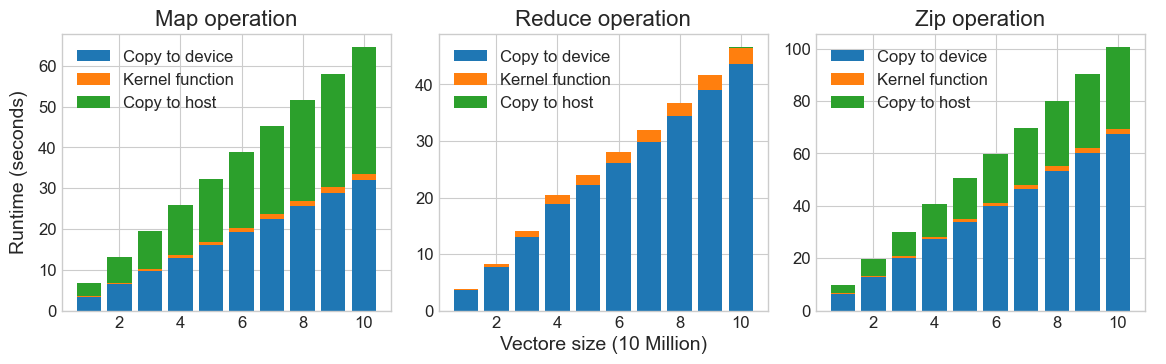

In [83]:
# Set style and size for better visibility
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3)

# Create stacked bar plots
axs[0].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['map_copy_device'].to_numpy(), label='Copy to device')
axs[0].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['map_kernel'].to_numpy(), bottom=parallel_df['map_copy_device'].to_numpy(), label='Kernel function')
axs[0].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['map_copy_host'].to_numpy(), bottom=parallel_df['map_copy_device'].to_numpy() + parallel_df['map_kernel'].to_numpy(), label='Copy to host')

# Set title
axs[0].set_title('Map operation', fontsize=16)

# Add legend
axs[0].legend(fontsize=12)

# Create stacked bar plots
axs[1].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['reduce_copy_device'].to_numpy(), label='Copy to device')
axs[1].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['reduce_kernel'].to_numpy(), bottom=parallel_df['reduce_copy_device'].to_numpy(), label='Kernel function')
axs[1].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['reduce_copy_host'].to_numpy(), bottom=parallel_df['reduce_copy_device'].to_numpy() + parallel_df['reduce_kernel'].to_numpy(), label='Copy to host')

# Set title
axs[1].set_title('Reduce operation', fontsize=16)

# Add legend
axs[1].legend(fontsize=12)

# Create stacked bar plots
axs[2].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['zip_copy_device'].to_numpy(), label='Copy to device')
axs[2].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['zip_kernel'].to_numpy(), bottom=parallel_df['zip_copy_device'].to_numpy(), label='Kernel function')
axs[2].bar(parallel_df['size'].to_numpy() / 10000000, parallel_df['zip_copy_host'].to_numpy(), bottom=parallel_df['zip_copy_device'].to_numpy() + parallel_df['zip_kernel'].to_numpy(), label='Copy to host')

# Set title
axs[2].set_title('Zip operation', fontsize=16)

# Add legend
axs[2].legend(fontsize=12)

# Add a big subplot covering all smaller ones
big_subplot = fig.add_subplot(111, frame_on=False)
# Hide tick and tick label of the big subplot
big_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_subplot.grid(False)

# Set labels for the big subplot
big_subplot.set_xlabel("Vectore size (10 Million)", fontsize=14)
big_subplot.set_ylabel("Runtime (seconds)", fontsize=14)

# Adjust layout
plt.tight_layout()

# Save and show the figure
plt.savefig('bottleneck.png', dpi=300)
plt.show()